In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

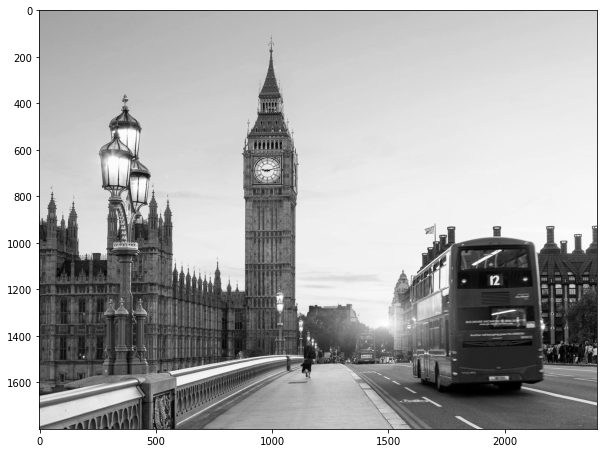

In [2]:
# Read the image (provided)
image = imageio.imread('london.jpg')
plt.imshow(image, cmap='gray')
plt.gcf().set_size_inches(10, 8)

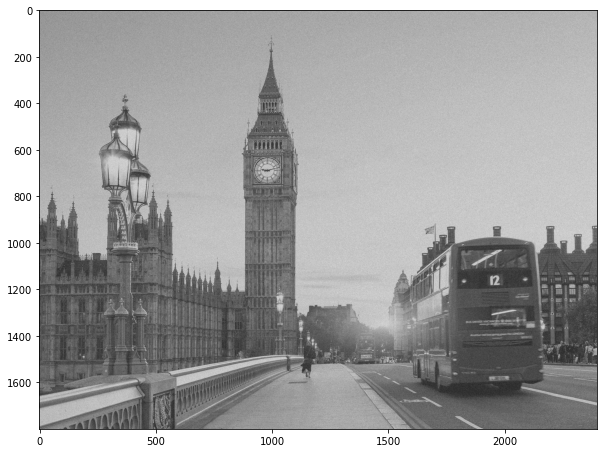

In [3]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')
plt.gcf().set_size_inches(10, 8)

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


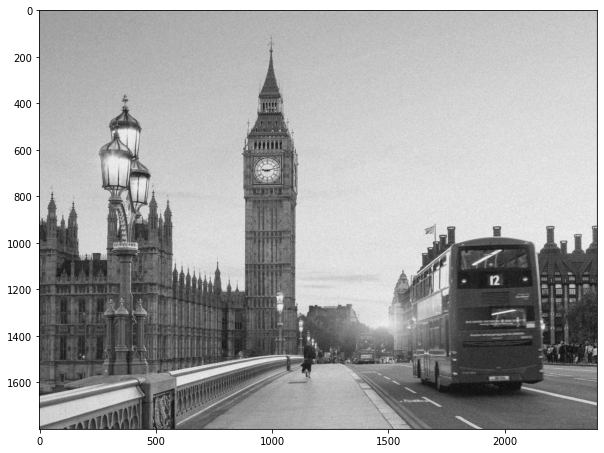

In [4]:
#1.1 Design the filter h of 3x3
h = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h,boundary='fill',mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

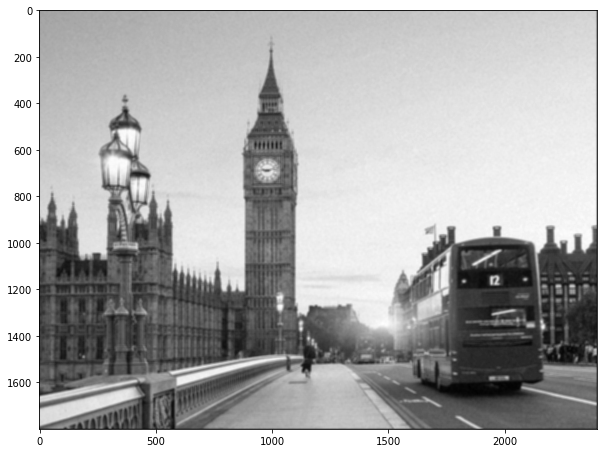

In [5]:
#1.2 Design the filter h of 11x11
h = np.ones((11,11))
h = (1/121) * h

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy,h,boundary='fill',mode='same')

# Print the filter (provided)
print('Filter h:')
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

In [6]:
#1.3 Comment on the filtering results
#Larger kernels remove more noise from the image
#However,larger kernels also blur out edges more  

h_sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
h_sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


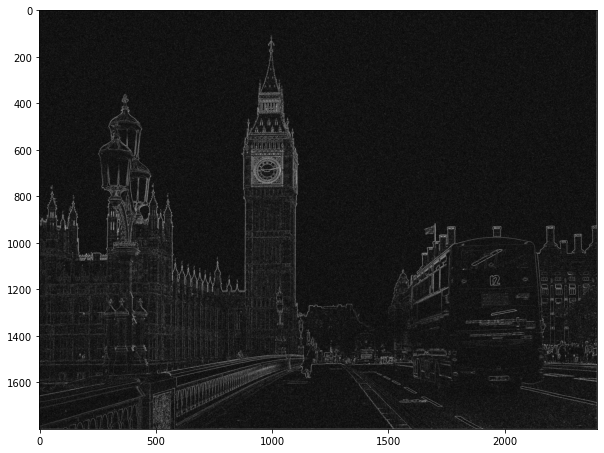

In [7]:
#2.1 Design the Sobel filters
h_sobel_x = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
h_sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

# Sobel filtering
g_x = scipy.signal.convolve2d(image_noisy,h_sobel_x,boundary='fill',mode='same')
g_y = scipy.signal.convolve2d(image_noisy,h_sobel_y,boundary='fill',mode='same')

# Calculate the gradient magnitude
g_x = g_x**2
g_y = g_y**2
sobel_mag = np.add(g_x,g_y)
sobel_mag = sobel_mag**0.5

# Print the filters (provided)
print('h_sobel_x:')
print(h_sobel_x)
print('h_sobel_y:')
print(h_sobel_y)

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray')
plt.gcf().set_size_inches(10, 8)

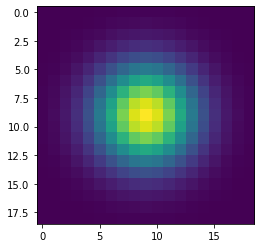

In [8]:
#2.2 Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    # 
    # return: a 2D array for the Gaussian kernel
    k = 3
    shape = (2*k*sigma+1,2*k*sigma+1)
    m,n = [(size-1.)/2. for size in shape]
    y,x = np.mgrid[-m:m+1,-n:n+1]
    grid = np.exp( -(x*x + y*y) / (2.*sigma*sigma))
    h = grid/(2*np.pi*sigma*sigma)
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Visualise the Gaussian filter when sigma = 3 pixel (provided)
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

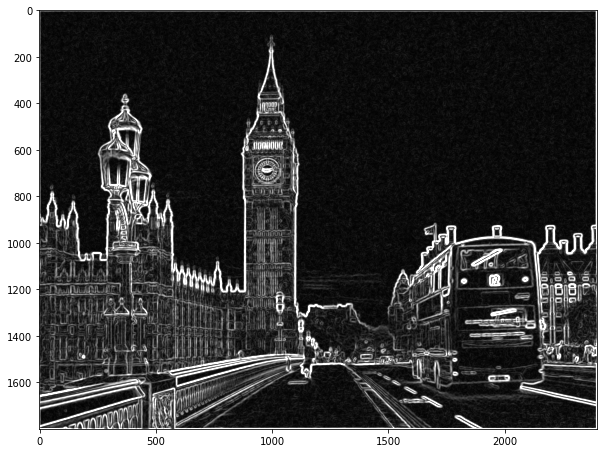

In [9]:
#2.3 Perform Gaussian smoothing before Sobel filtering
sigma = 3
h = gaussian_filter_2d(sigma)
gaussian_filtered = scipy.signal.convolve2d(image_noisy,h,boundary='fill',mode='same')

#Sobel filtering
g_x = scipy.signal.convolve2d(gaussian_filtered,h_sobel_x,boundary='fill',mode='same')
g_y = scipy.signal.convolve2d(gaussian_filtered,h_sobel_y,boundary='fill',mode='same')

#Calculate the gradient magnitude
g_x = g_x**2
g_y = g_y**2
sobel_mag = np.add(g_x,g_y)
sobel_mag = sobel_mag**0.5

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

21.11053705215454


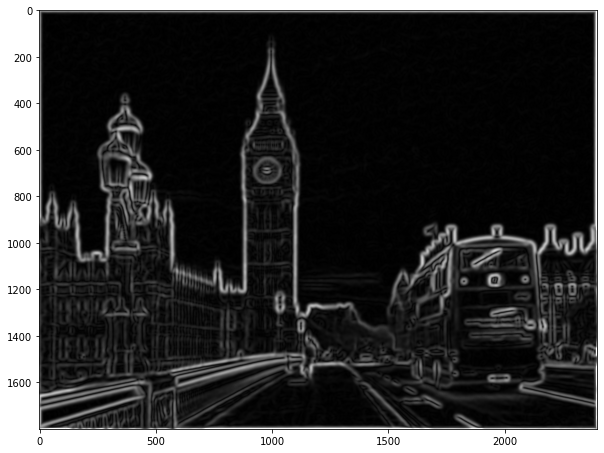

In [10]:
#2.4 Construct the Gaussian filter
sigma = 7
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
start = time.time()
gaussian_filtered = scipy.signal.convolve2d(image_noisy,h,boundary='fill',mode='same')
end = time.time()
print(end-start)

# Sobel filtering
g_x = scipy.signal.convolve2d(gaussian_filtered,h_sobel_x,boundary='fill',mode='same')
g_y = scipy.signal.convolve2d(gaussian_filtered,h_sobel_y,boundary='fill',mode='same')

# Calculate the gradient magnitude
g_x = g_x**2
g_y = g_y**2
sobel_mag = np.add(g_x,g_y)
sobel_mag = sobel_mag**0.5

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

[0.00063446 0.00096405 0.00143526 0.00209363 0.0029923  0.00419031
 0.00574944 0.00772932 0.01018108 0.01313963 0.01661535 0.02058603
 0.02499036 0.02972414 0.0346404  0.03955427 0.0442528  0.04850929
 0.05210099 0.05482818 0.05653255 0.05711236 0.05653255 0.05482818
 0.05210099 0.04850929 0.0442528  0.03955427 0.0346404  0.02972414
 0.02499036 0.02058603 0.01661535 0.01313963 0.01018108 0.00772932
 0.00574944 0.00419031 0.0029923  0.00209363 0.00143526 0.00096405
 0.00063446]


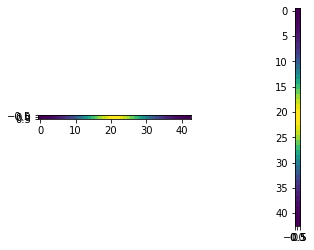

In [11]:
#2.5 Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel 
    k = 3
    size = 2*k*sigma+1
    m = (size-1)/2 
    x = np.mgrid[-m:m+1]
    grid = np.exp( -(x*x) / (2.*sigma*sigma))
    h = grid/(np.sqrt(2*np.pi)*sigma)
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# sigma = 7 pixel (provided)
sigma = 7
h = gaussian_filter_1d(sigma)
print(h)

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = np.atleast_2d(h)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = np.transpose(h_x)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

1.7484946250915527


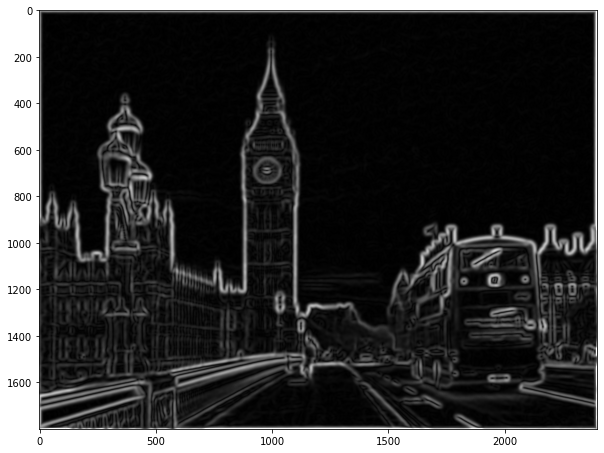

In [12]:
#2.6 Perform separable Gaussian smoothing and count time
sigma = 7
h = gaussian_filter_2d(sigma)
start = time.time()
gaussian_filtered_x = scipy.signal.convolve2d(image_noisy,h_x,boundary='fill',mode='same')
gaussian_filtered = scipy.signal.convolve2d(gaussian_filtered_x,h_y,boundary='fill',mode='same')
end = time.time()
print(end-start)

# Sobel filtering
g_x = scipy.signal.convolve2d(gaussian_filtered,h_sobel_x,boundary='fill',mode='same')
g_y = scipy.signal.convolve2d(gaussian_filtered,h_sobel_y,boundary='fill',mode='same')

# Calculate the gradient magnitude
g_x = g_x**2
g_y = g_y**2
sobel_mag = np.add(g_x,g_y)
sobel_mag = sobel_mag**0.5

# Display the magnitude image (provided)
plt.imshow(sobel_mag, cmap='gray', vmin=0, vmax=100)
plt.gcf().set_size_inches(10, 8)

In [13]:
#2.7 Comment on the Gaussian + Sobel filtering results and the computational time
#Gaussian + Sobel filtering results in more clear edges than Sobel filtering alone 
#as noises which are sensitive to derivatives are smoothed
#Greater sigma in Gasussian filter reduces more image details 
#and blurs the image more hence reduces more the effects of noises 
#Computational time using two 1d guassian filter is much faster than 
#the counterpart using 2d guassian filter;in this
#experiment in particular, using separate filtering is 10 times more faster

In [14]:
# Import libaries (provided)
import torch
#3.1 Expand the dimension of the numpy array
y = np.expand_dims(image_noisy, axis=0)
z = np.expand_dims(y, axis=0)

# Convert to a Pytorch tensor using torch.from_numpy
image_noisy_tensor = torch.from_numpy(z)

In [15]:
#3.2 Create the Conv2D filter (provided)
conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=1, bias=False)
# Set the kernel weight
K = 1/9*np.ones((3,3))
K = np.expand_dims(K, axis=0)
K = np.expand_dims(K, axis=0)
K = torch.from_numpy(K)
K = torch.nn.Parameter(K)
conv.weight = K

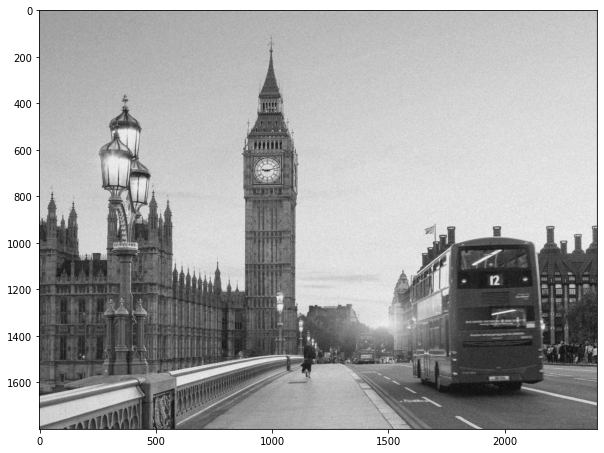

In [16]:
#3.3 Filtering
image_filtered_tensor = conv(image_noisy_tensor)
image_4d = image_filtered_tensor.detach().numpy()
image_filtered = image_4d[0,0,:,:]
# Display the filtering result (provided)
plt.imshow(image_filtered, cmap='gray')
plt.gcf().set_size_inches(10, 8)

In [17]:
#4 Survey: How long does it take you to complete the coursework?
#2 days